In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

/Users/koretsunobuyasu/.pyenv/versions/3.7.5/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


'%.3f'

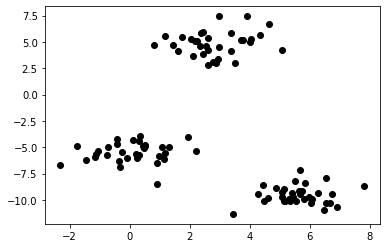

In [3]:
# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データ取得のためのインポート
from sklearn.datasets import make_blobs

# サンプルデータ生成
# 注意: make_blobsは2つの値を返すため、一方は使用しない「＿」で受け取る
X, _ = make_blobs(random_state=10)

# グラフを描画
# colorのオプションで色付けができる
plt.scatter(X[:, 0], X[:, 1], color='black')

In [5]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=3)

# クラスターの重心を計算
kmeans.fit(X)

# クラスター番号を予測
y_pred = kmeans.predict(X)

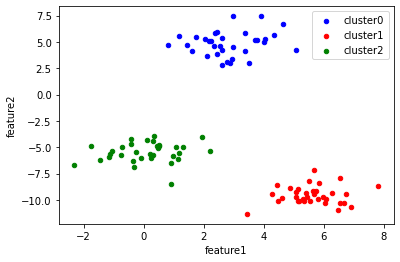

In [7]:
# concatでデータを横に結合
merge_data = pd.concat(
    [
        pd.DataFrame(X[:, 0]),
        pd.DataFrame(X[:, 1]),
        pd.DataFrame(y_pred)
    ],
    axis=1
)

# 上記のデータにて、X軸をfeature1, Y軸をfeature2、クラスター番号をclusterと列名指定
merge_data.columns = ['feature1', 'feature2', 'cluster']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(
        x='feature1',
        y='feature2',
        color=colors[i],
        label=f'cluster{i}',
        ax=ax
    )

In [8]:
# webからデータを取得したり、zipファイルを扱うためのライブラリをインポート
import requests, zipfile
import io

# データがあるurlを指定
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

# データを取得して展開する
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [10]:
# 対象データの読み込み
bank = pd.read_csv('bank-full.csv', sep=';')

# 先頭5行を表示
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
print(f'データの形式(X,y): {bank.shape}')
print(f'欠損データの数: {bank.isnull().sum().sum()}')

データの形式(X,y): (45211, 17)
欠損データの数: 0


In [15]:
from sklearn.preprocessing import StandardScaler

# データの列の絞り込み
bank_sub = bank[
    [
        'age',
        'balance',
        'campaign',
        'previous'
    ]
]

# 標準化
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
display(bank_sub.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


None

1    23608
0    14411
2     3837
3     1373
4     1282
5      700
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

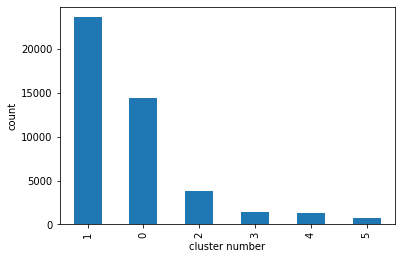

In [24]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(bank_sub_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# クラスター番号と件数を表示
print(labels.value_counts(sort=True))

# グラフを描画
ax = labels.value_counts(sort=True).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

Text(0, 0.5, 'Distortion')

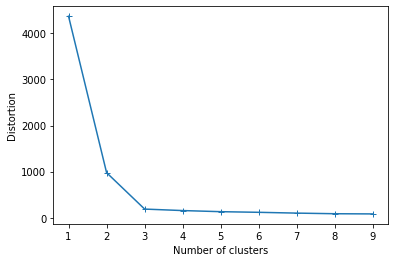

In [25]:
# エルボー法による推定. クラスター数を1から10に増やしてそれぞれの距離の総和を求める
dist_list = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)

# グラフを表示
plt.plot(range(1, 10), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'Distortion')

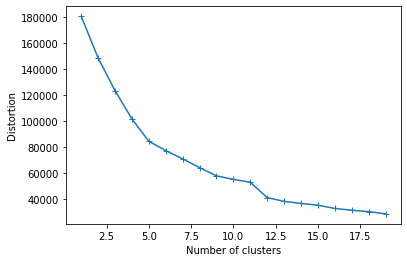

In [26]:
# エルボー法による推定. クラスター数を1から20に増やしてそれぞれの距離の総和を求める
dist_list = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)
    
# グラフを表示
plt.plot(range(1, 20), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [27]:
# 金融機関のデータにクラスター番号のデータを結合
bank_with_cluster = pd.concat([bank, labels], axis=1)

#　先頭の5行を表示
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


In [28]:
# 分割のための区切りを設定
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)

df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,0,0,0,0,0,1023,4490,3833,3480,850,735
1,45,705,3965,8221,6731,3941,0,0,0,0,0
2,1,20,230,788,956,718,598,328,165,29,4
3,0,20,129,327,306,186,145,117,71,38,34
4,0,11,74,240,219,203,156,140,155,48,36
5,1,6,66,164,137,114,81,70,51,9,1


In [29]:
# 分割したデータ数をカウント
hist_age = pd.value_counts(qcut_age)
display(hist_age)

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

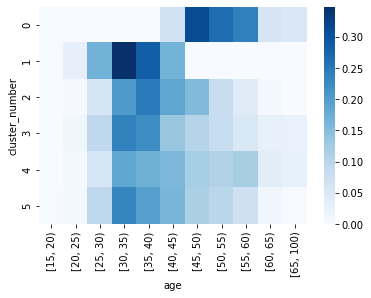

In [31]:
sns.heatmap(cross_cluster_age.apply(lambda x: x/x.sum(), axis=1), cmap='Blues')

In [32]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
display(cross_cluster_job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,1408,2906,530,652,2723,2006,476,1073,3,2048,432,154
1,3005,5385,697,409,4933,55,820,2474,812,4256,687,75
2,392,862,145,107,895,59,139,370,42,701,91,34
3,193,239,42,21,335,53,42,113,53,244,33,5
4,109,175,54,36,417,77,71,69,22,192,49,11
5,64,165,19,15,155,14,31,55,6,156,11,9


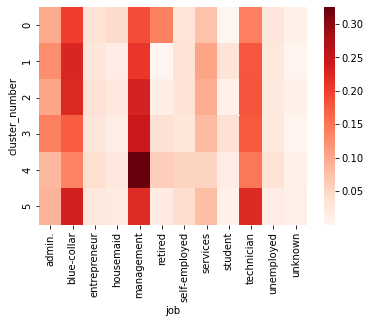

In [33]:
sns.heatmap(cross_cluster_job.apply(lambda x: x / x.sum(), axis=1), cmap='Reds')

## 主成分分析

相関係数0.889:


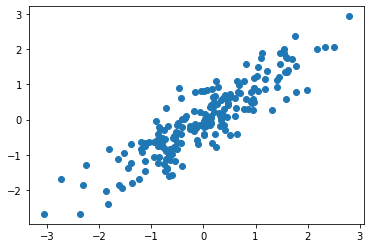

In [36]:
from sklearn.preprocessing import StandardScaler

# RandomStateオブジェクトを作成
sample = np.random.RandomState(1)

# 2つの乱数を生成
X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 相関係数の算出とグラフ化
print(f'相関係数{sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]:.3f}:')
plt.scatter(X_std[:, 0], X_std[:, 1])

In [38]:
# インポート
from sklearn.decomposition import PCA

#　主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [39]:
print(pca.components_)

[[-0.707 -0.707]
 [-0.707  0.707]]


In [40]:
print(f"各主成分の分散: {pca.explained_variance_}")

各主成分の分散: [1.899 0.111]


In [41]:
print(f'各主成分の分散割合: {pca.explained_variance_ratio_}')

各主成分の分散割合: [0.945 0.055]


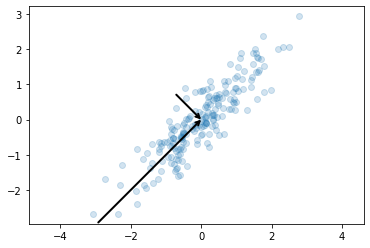

In [43]:
# パラメータ設定
arrowprops = dict(
    arrowstyle='->',
    linewidth=2,
    shrinkA=0,
    shrinkB=0
)

# 矢印を描くための関数
def draw_vector(v0, v1):
    plt.gca().annotate('', v0, v1, arrowprops=arrowprops)
    
# 元のデータをプロット
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

# 主成分分析の2軸を矢印で表示する
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal');

### 主成分分析の実例

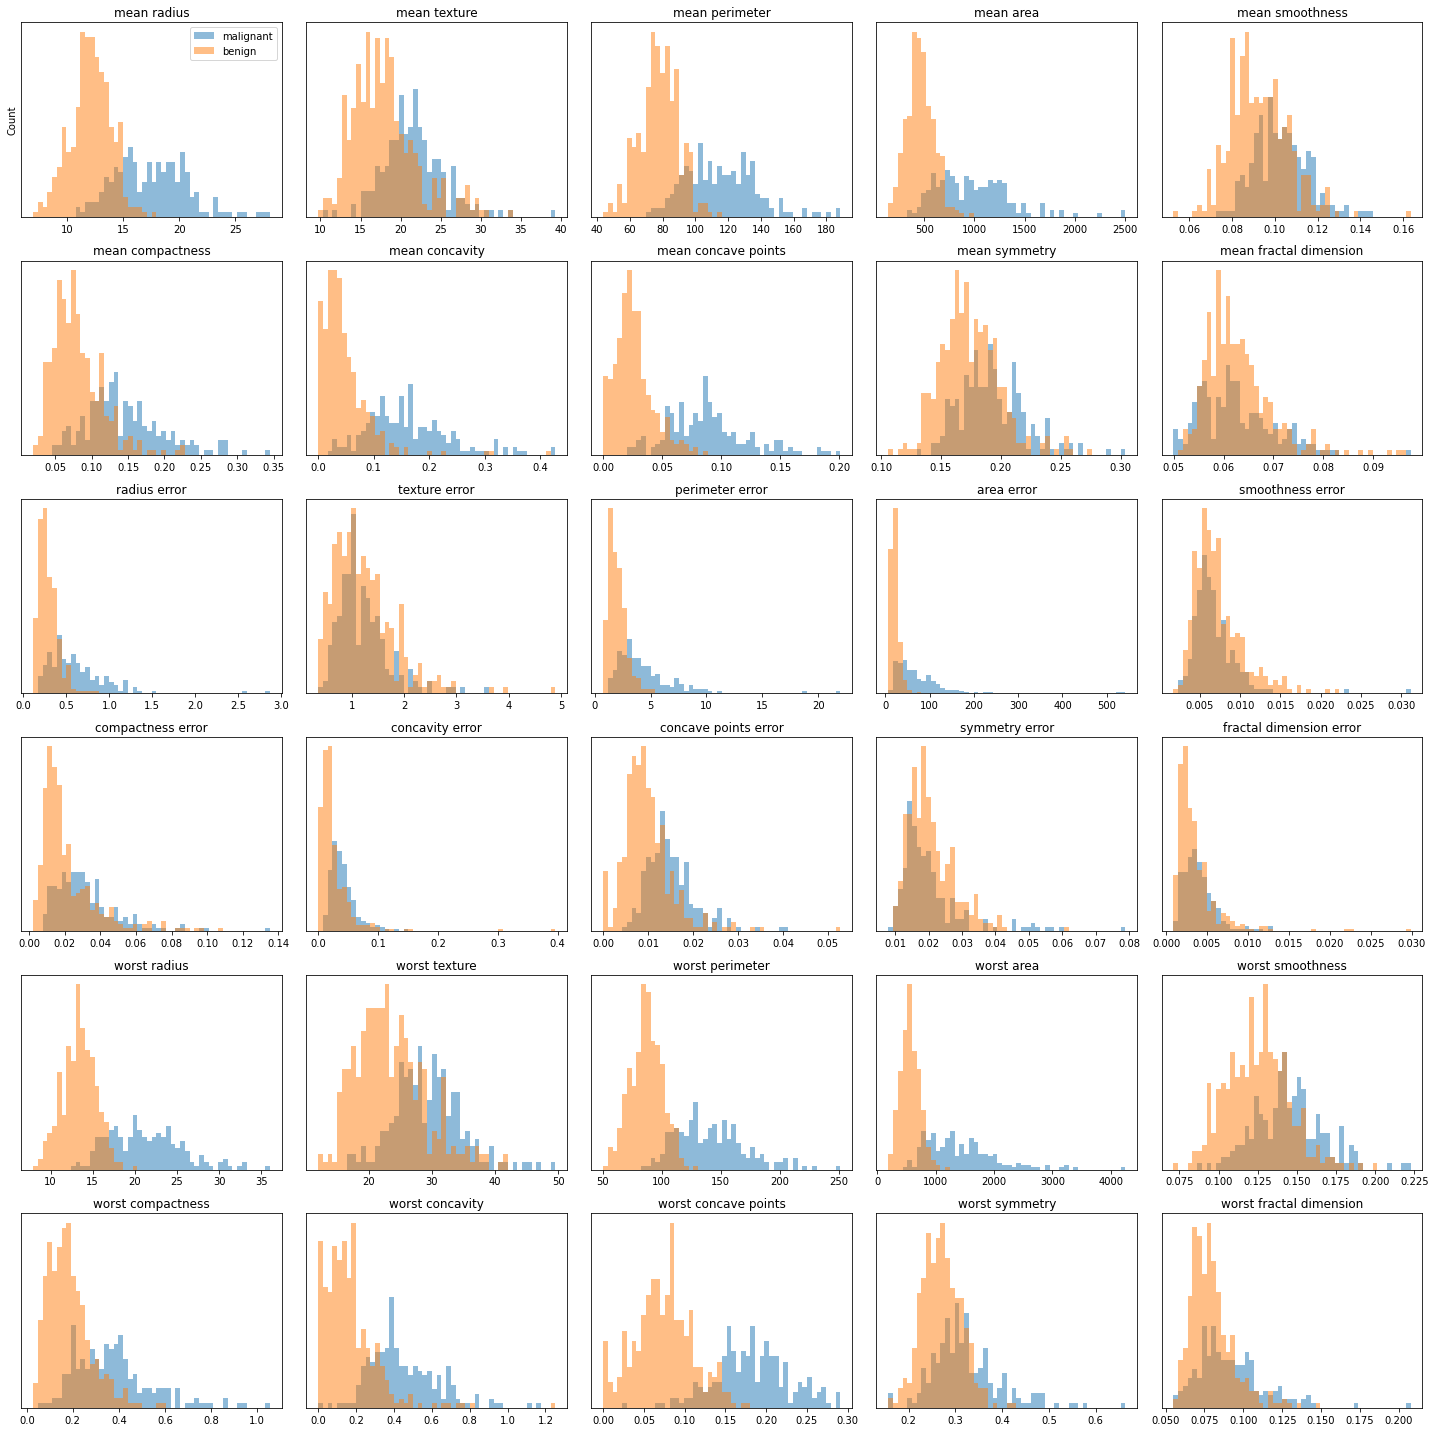

In [44]:
# 乳がんデータを読み込むためのインポート
from sklearn.datasets import load_breast_cancer

# 乳がんデータの取得
cancer = load_breast_cancer()

# データをmalignant(悪性)かbenign(良性)に分けるためのフィルター処理
# malignant(悪性)はcancer.targetが0
malignant = cancer.data[cancer.target==0]

# benign(良性)はcancer.targetが1
benign = cancer.data[cancer.target==1]

# malignant(悪性)がブルー、benign(良性)がオレンジのヒストグラム
# 各図は各の説明変数(mean radiusなど)と目的変数との関係を示したヒストグラム
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins, alpha=.5)
    ax[i].hist(benign[:, i], bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
# ラベルの設定
ax[0].set_ylabel('Count')
ax[0].legend(
    [
        'malignant',
        'benign'
    ],
    loc='best'
)
fig.tight_layout()

In [45]:
# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# 表示
print(f'X_pca shape: {X_pca.shape}')
print(f'Explained variance ratio : {pca.explained_variance_ratio_}')

X_pca shape: (569, 2)
Explained variance ratio : [0.443 0.19 ]


In [46]:
# 列にラベルをつける、 1つ目が第一主成分, 2つ目が第二主成分
X_pca = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])

# 上のデータに目的変数(cancer.target)を紐付ける,横に結合
X_pca = pd.concat(
    [
        X_pca,
        pd.DataFrame(cancer.target, columns=['target'])
    ],
    axis=1
)

# 悪性、良性を分ける
pca_malignant = X_pca[X_pca['target'] == 0]
pca_benign = X_pca[X_pca['target'] == 1]

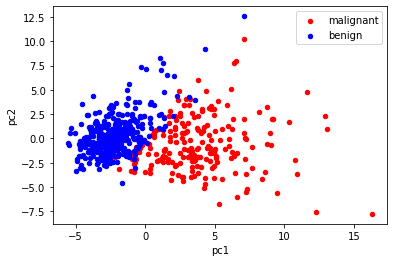

In [49]:
# 悪性をプロット
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red',  label='malignant');

#　良性をプロット
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax);

In [52]:
trans = pd.read_excel('Online Retail.xlsx', sheep_name='Online Retail')
trans.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [53]:
# InvoiceNoの先頭1文字をcancel_flgとして追加
trans['cancel_flg'] = trans.InvoiceNo.map(lambda x: str(x)[0])

# cancel_flgでグルーピングして集計
trans.groupby('cancel_flg').size()

cancel_flg
5    532618
A         3
C      9288
dtype: int64

In [54]:
trans = trans[(trans.cancel_flg == '5') & (trans.CustomerID.notnull())]

In [55]:
# StockCodeごとに件数を数え、上位5件を表示
trans['StockCode'].value_counts().head(5)

85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
Name: StockCode, dtype: int64

In [58]:
# 全てのInvoiceNoをtrans_allとして抽出
trans_all = set(trans.InvoiceNo)

# 商品85123Aを購入したデータをtrans_aとする
trans_a = set(trans[trans['StockCode'] == '85123A'].InvoiceNo)
print(len(trans_a))

# 商品85099Bを購入したデータをtrans_bとする
trans_b = set(trans[trans['StockCode'] == '85099B'].InvoiceNo)
print(len(trans_b))

# 商品85123A及び85099Bを購入したデータをtrans_abとする
trans_ab = trans_a&trans_b
print(len(trans_ab))

1978
1600
252


In [59]:
# trans_abの、両商品を含むバスケットの数を表示
print(f'両商品を∋バスケットの数{len(trans_ab)}')
print(f'両商品を含むバスケットの全体に占める割合: {len(trans_ab)/len(trans_all):.3f}')

両商品を∋バスケットの数252
両商品を含むバスケットの全体に占める割合: 0.014


In [61]:
print('85123Aの支持度')
print(f'商品85123Aのバスケットの数: {len(trans_a)}')
print(f'商品85123Aを含むバスケットの全体に占める割合: {len(trans_a) / len(trans_all):.3f}')

85123Aの支持度
商品85123Aのバスケットの数: 1978
商品85123Aを含むバスケットの全体に占める割合: 0.107


In [63]:
print(f'確信度: {len(trans_ab) / len(trans_a):.3f}')

確信度: 0.127


In [64]:
print('商品85099Bを買うなら商品85123Aを購入数というルールの確信度')
print(f'確信度: {len(trans_ab)/len(trans_b):.3f}')

商品85099Bを買うなら商品85123Aを購入数というルールの確信度
確信度: 0.158


In [65]:
# 全体のバスケットに占める商品Bの購買率を計算
support_b = len(trans_b) / len(trans_all)

# 商品Aを購買した時の商品Bの購買率を計算
confidence = len(trans_ab) / len(trans_a)

# リフト値を計算
lift = confidence / support_b
print(f'lift: {lift:.3f}')

lift: 1.476


- 確信度が高い数値
    - リフト値が1.0を下回れば商品推奨の根拠は不適切かもしれない